In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import wordcloud
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.util import *
from nltk.sentiment.util import *

In [3]:
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
trump = pd.read_csv('hashtag_donaldtrump.csv',lineterminator='\n')
biden = pd.read_csv('hashtag_joebiden.csv',lineterminator='\n')

In [5]:
trump

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970914,2020-11-08 23:59:43,1.325589e+18,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,0.0,0.0,Twitter Web App,3.427951e+09,Alexander P. Vogt,APVogt,Wenn das Aussprechen der Wahrheit »den Falsche...,...,2106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.036006
970915,2020-11-08 23:59:48,1.325589e+18,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,4.0,0.0,Twitter Web App,3.245258e+09,ahzy,ahhhzy,NaN,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.715870
970916,2020-11-08 23:59:53,1.325589e+18,#AfD|ler reagieren panisch bis hysterisch auf ...,25.0,4.0,Twitter Web App,9.866108e+17,watchdog,wilke_tobias,Quis custodiet ipsos custodes?\n\nTV Journalis...,...,3014.0,Saxony/GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.975868
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,1079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674


In [6]:
biden

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,...,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,...,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,...,15806.0,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,...,5974.0,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846


In [7]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


In [8]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [9]:
trump['candidate'] = 'Trump'

In [10]:
biden['candidate'] = 'Biden'

In [11]:
data = pd.concat([trump,biden])

In [12]:
data

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,...,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547,Biden
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617,Biden
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,...,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335,Biden
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,...,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846,Biden


<AxesSubplot: xlabel='candidate'>

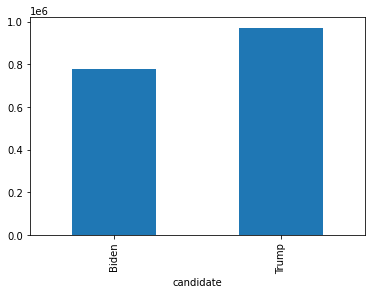

In [13]:
#### number of tweets recieved for each candidate 
data.groupby('candidate')['tweet'].count().plot.bar()

<AxesSubplot: xlabel='candidate'>

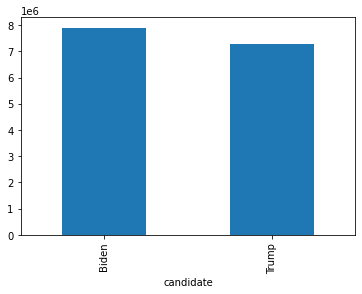

In [14]:
###comparison of likes
data.groupby('candidate')['likes'].sum().plot.bar()

In [15]:
data.country.value_counts()

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 189, dtype: int64

In [16]:
data['country'] = data['country'].replace({"United States of America":"US","United States":"US"})

<AxesSubplot: xlabel='candidate'>

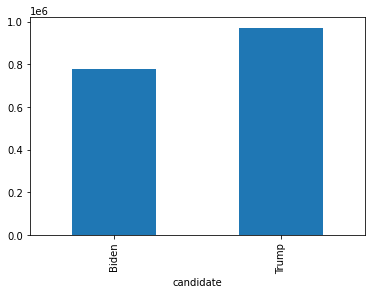

In [17]:
data.groupby('candidate')['retweet_count'].count().plot.bar()

<AxesSubplot: xlabel='country'>

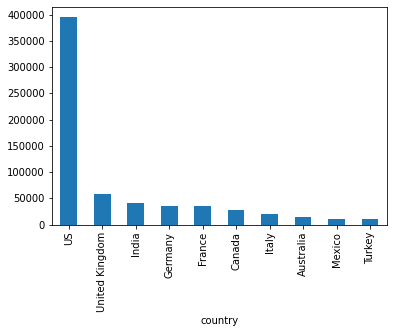

In [18]:
##countries with higher number of tweets - bar graph
data.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()

In [19]:
#tweets for biden and trump from top 10 countries
top10countries = data.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
x = data.groupby(['country','candidate'])['tweet'].count().reset_index()
x = x[x['country'].isin(top10countries)]

<AxesSubplot: xlabel='country', ylabel='tweet'>

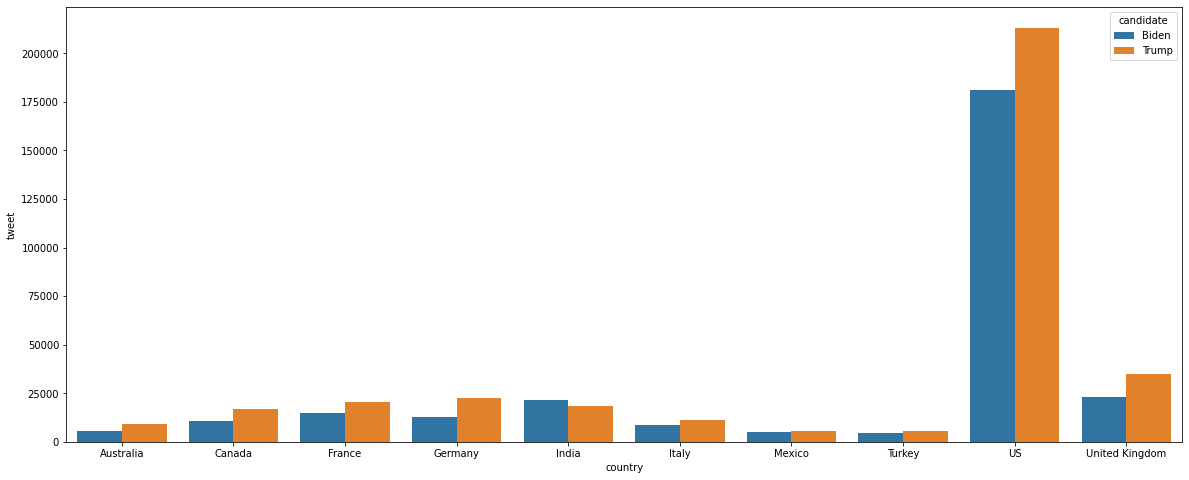

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(data=x,x='country',y='tweet',hue='candidate')

## Sentiment Analysis of presidential elections

In [21]:
lm = WordNetLemmatizer()

In [22]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text

In [23]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def polarity(text):
    return TextBlob(text).sentiment.polarity
def getanalysis(score):
    if score<0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    elif score>0:
        return 'positive'

In [24]:
trumpdata = data[data['candidate']=='Trump']

In [25]:
trumpdata = trumpdata[trumpdata['country']=='US']

In [26]:
trumpdata 

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,US,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,"Perris,California",33.782519,-117.228648,NaN,US,North America,California,CA,2020-10-21 00:00:01.866082651,Trump
7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two...",...,"Ohio, USA",40.225357,-82.688140,NaN,US,North America,Ohio,OH,2020-10-21 00:00:02.612515712,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970893,2020-11-08 23:58:46,1.325589e+18,@DonaldJTrumpJr Being a #tRump you are intimat...,0.0,0.0,Twitter for iPad,1.237758e+18,U N Known,pirkka2,Truth will save the world - not tRump. 🌎 VOTE ...,...,"New Jersey, USA",40.075738,-74.404162,NaN,US,North America,New Jersey,NJ,2020-11-09 17:47:55.744839,Trump
970895,2020-11-08 23:58:51,1.325589e+18,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,4.835231e+07,"Linda ""I Voted for Biden"" Kenney Baden",KenneyBaden,"TrialLawyer https://t.co/1C0kKESSUC, Played by...",...,"New York, USA",40.712728,-74.006015,New York,US,North America,New York,NY,2020-11-09 17:47:55.833725,Trump
970897,2020-11-08 23:58:56,1.325589e+18,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,1.0,0.0,Twitter for Android,9.868225e+17,IUIC Minnesota,IUICMinnesota,NaN,...,"Minnesota, USA",45.989659,-94.611329,NaN,US,North America,Minnesota,MN,2020-11-09 17:47:55.847439,Trump
970900,2020-11-08 23:59:05,1.325589e+18,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,0.0,0.0,Twitter for Android,1.296581e+18,🍿🍷••HellWorld••🍷🍿,HellWor09724785,NaN,...,Hell on Earth,34.233137,-102.410749,NaN,US,North America,Texas,TX,2020-11-09 17:47:55.939901,Trump


In [27]:
trumpdata = trumpdata[['tweet']]

In [28]:
trumpdata

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...
2,"#Trump: As a student I used to hear for years,..."
4,You get a tie! And you get a tie! #Trump ‘s ra...
5,@CLady62 Her 15 minutes were over long time ag...
7,@DeeviousDenise @realDonaldTrump @nypost There...
...,...
970893,@DonaldJTrumpJr Being a #tRump you are intimat...
970895,Have you know decency #Trump @GOP? Do you kno...
970897,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...
970900,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...


In [29]:
trumpdata['cleantweets'] = trumpdata['tweet'].apply(clean)

<ipython-input-29-3c2f66cb229c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trumpdata['cleantweets'] = trumpdata['tweet'].apply(clean)


In [36]:
trumpdata

,tweet,cleantweets,polarity,subjectivity,analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh,0.000000,0.000000,neutral
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,-0.108333,0.416667,negative
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.050000,0.533333,positive
...,...,...,...,...,...
970893,@DonaldJTrumpJr Being a #tRump you are intimat...,donaldjtrumpjr trump intimately familiar disgu...,-0.312500,0.750000,negative
970895,Have you know decency #Trump @GOP? Do you kno...,know decency trump gop know like child die bil...,-0.600000,0.700000,negative
970897,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,lionz den present white obama get ready live f...,-0.021753,0.371429,negative
970900,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,trump patriot maga http co fnm ux,0.000000,0.000000,neutral


In [37]:
trumpdata['polarity'] = trumpdata['cleantweets'].apply(polarity)

<ipython-input-37-e59ca783e15c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trumpdata['polarity'] = trumpdata['cleantweets'].apply(polarity)


In [38]:
trumpdata['subjectivity'] = trumpdata['cleantweets'].apply(subjectivity)

<ipython-input-38-f2c1edf3ea67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trumpdata['subjectivity'] = trumpdata['cleantweets'].apply(subjectivity)


In [39]:
trumpdata['analysis'] = trumpdata['polarity'].apply(getanalysis)

<ipython-input-39-c0e384c8c3a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trumpdata['analysis'] = trumpdata['polarity'].apply(getanalysis)


In [40]:
trumpdata

,tweet,cleantweets,polarity,subjectivity,analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh,0.000000,0.000000,neutral
5,@CLady62 Her 15 minutes were over long time ag...,clady minute long time ago omarosa never repre...,-0.108333,0.416667,negative
7,@DeeviousDenise @realDonaldTrump @nypost There...,deeviousdenise realdonaldtrump nypost many unl...,0.050000,0.533333,positive
...,...,...,...,...,...
970893,@DonaldJTrumpJr Being a #tRump you are intimat...,donaldjtrumpjr trump intimately familiar disgu...,-0.312500,0.750000,negative
970895,Have you know decency #Trump @GOP? Do you kno...,know decency trump gop know like child die bil...,-0.600000,0.700000,negative
970897,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,lionz den present white obama get ready live f...,-0.021753,0.371429,negative
970900,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,trump patriot maga http co fnm ux,0.000000,0.000000,neutral


In [41]:
bidendata = data[data['candidate']=='Biden']
bidendata = bidendata[bidendata['country']=='US']
bidendata = bidendata[['tweet']]
bidendata['cleantweets'] = bidendata['tweet'].apply(clean)

In [42]:
bidendata['polarity'] = bidendata['cleantweets'].apply(polarity)
bidendata['subjectivity'] = bidendata['cleantweets'].apply(subjectivity)
bidendata['analysis'] = bidendata['polarity'].apply(getanalysis)

In [43]:
bidendata

,tweet,cleantweets,polarity,subjectivity,analysis
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,elecciones en florida joebiden dice que donald...,0.000000,0.000000,neutral
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,islandgirlprv bradbeauregardj meidastouch bide...,0.000000,0.000000,neutral
4,#censorship #HunterBiden #Biden #BidenEmails #...,censorship hunterbiden biden bidenemails biden...,0.000000,0.000000,neutral
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,-0.148810,0.678571,negative
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",fbi allegedly obtained hunter biden computer d...,-0.100000,0.100000,negative
...,...,...,...,...,...
776861,#election #2020Elections #trump #biden https:/...,election election trump biden http co cvkctsyl,0.000000,0.000000,neutral
776862,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,gop gopleader senatemajldr lindseygrahamsc tak...,0.000000,0.000000,neutral
776865,@FLOTUS I’m excited to have a FLOTUS whose vag...,flotus excited flotus whose vagina seen twitte...,0.375000,0.750000,positive
776870,The man needs some help...#usa #biden\nWhen wi...,man need help usa biden go http co f dj syt,0.000000,0.000000,neutral


In [44]:
bidendata['analysis'].value_counts()

neutral     84721
positive    66093
negative    30323
Name: analysis, dtype: int64

In [45]:
trumpdata['analysis'].value_counts()

neutral     92097
positive    72568
negative    48598
Name: analysis, dtype: int64

In [46]:
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  all_words = ' '.join([text for text in wd_list])
  wordcloud = WordCloud(background_color = 'white',stopwords = stopwords,width = 1000,height=900,max_words= 100,max_font_size=200).generate(all_words)
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud)

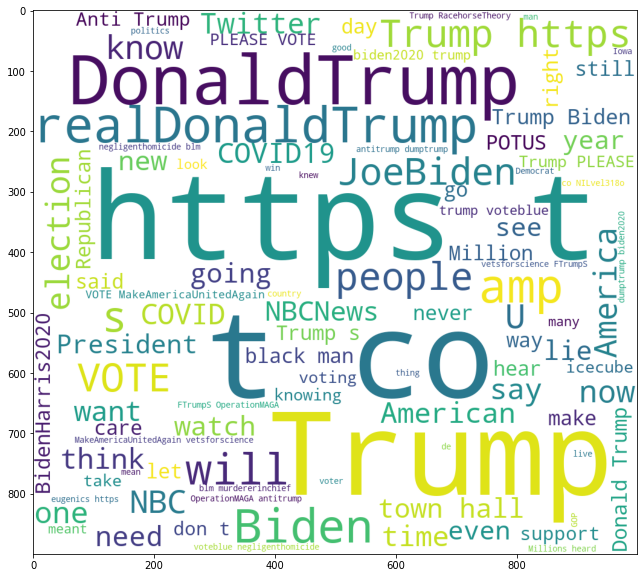

In [47]:
word_cloud(trumpdata['tweet'][:5000])

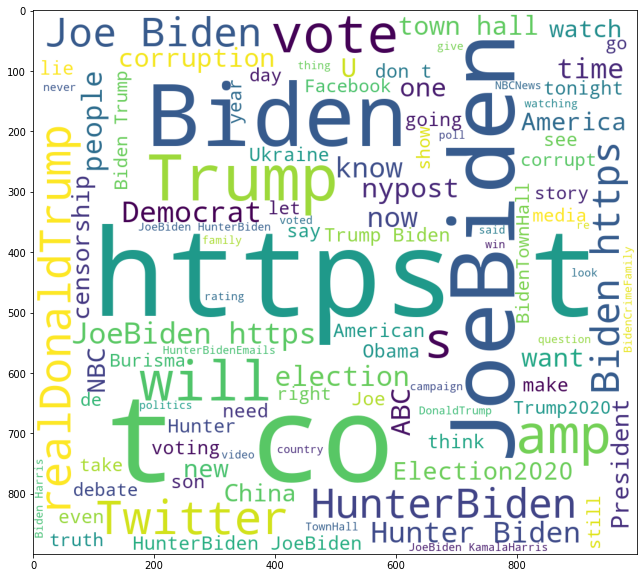

In [48]:
word_cloud(bidendata['tweet'][:5000])